<a href="https://colab.research.google.com/github/ChrisJavier/uide-Week_01-DataClean/blob/main/src/AMGD_CP_W1_E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Trabajo 1: Ejercicio de Aplicacion Autonoma

## 📋 Información del Proyecto
- Autores:
  - CARRERA DIAZ CHRISTIAN JAVIER
  - CERNA PACHECHO ROMEL MICHAEL
  - LUNA ARTEGA ALEXANDER PAUL
- Versión: 1.0.0
- Licencia: MIT


🎯 Objetivos:

Ustedes han sido contratados como el equipo de Data Science para una firma de inversión
inmobiliaria ("PropTech"). La firma quiere comprar propiedades para ponerlas en alquiler vacacional
(tipo Airbnb) pero no saben:
 - Qué barrios son los más rentables.
 - Qué características (amenidades) permiten cobrar más por noche.
 - Cómo se distribuye la demanda a lo largo del año.

El dataset utilizado es el siguiente:

- Berlin(Airbnb): https://data.insideairbnb.com/germany/be/berlin/2025-09-23/data/listings.csv.gz

## 1️⃣ Fase 1: Ingenieria de Datos y Limpieza

## 🚀 1.1. Descarga del dataset

In [189]:
import os

# File compress and uncompress name`
compressed_file_path = 'dataset.csv.gz'
## Download file of dataset on
!wget 'https://data.insideairbnb.com/germany/be/berlin/2025-09-23/data/listings.csv.gz' -O {compressed_file_path}

--2026-02-02 21:32:24--  https://data.insideairbnb.com/germany/be/berlin/2025-09-23/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 143.204.204.13, 143.204.204.129, 143.204.204.47, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|143.204.204.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7263842 (6.9M) [application/x-gzip]
Saving to: ‘dataset.csv.gz’

dataset.csv.gz      100%[===================>]   6.93M  --.-KB/s    in 0.09s   

2026-02-02 21:32:25 (79.9 MB/s) - ‘dataset.csv.gz’ saved [7263842/7263842]



## 🚀 1.2. Previsualizacion y validacion

El dataset debe contener al menos 10000 registos para utilizarlo en el trabajo.

In [190]:
import pandas as pd


df = pd.read_csv(compressed_file_path)

# Validacion que contenga el minimo de registros solicitados en el ejercicio
if df.shape[0] < 10000:
  raise Exception
else:
  print(f'Dataset validado, el dataset contiene {df.shape[0]} registros \n')

# Describe el dataset cargado
print(f'El dataset contiene {df.shape[0]} registros y {df.shape[1]} columnas \n')
df.describe()



Dataset validado, el dataset contiene 14274 registros 

El dataset contiene 14274 registros y 79 columnas 



,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.427400e+04,1.427400e+04,1.427400e+04,14260.000000,14260.000000,14274.000000,14274.000000,14274.000000,9330.000000,12250.000000,...,10960.000000,10957.000000,10959.000000,10957.000000,10956.000000,14274.000000,14274.00000,14274.000000,14274.000000,10960.000000
mean,5.216123e+17,2.025092e+13,1.916958e+08,25.747966,29.718373,52.508918,13.402307,3.052963,1.147856,1.356898,...,4.698032,4.826761,4.820638,4.761114,4.647221,14.070898,11.89022,1.973939,0.144529,1.298455
std,5.756023e+17,6.054900e+00,2.097931e+08,106.650292,126.145753,0.033824,0.068137,1.925029,0.480433,0.834283,...,0.404522,0.324465,0.366855,0.328695,0.404457,48.440490,46.97473,11.317932,1.527690,2.083910
min,3.176000e+03,2.025092e+13,1.581000e+03,1.000000,1.000000,52.341716,13.116893,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.010000
25%,2.152686e+07,2.025092e+13,1.767847e+07,1.000000,1.000000,52.490116,13.362065,2.000000,1.000000,1.000000,...,4.590000,4.790000,4.800000,4.670000,4.540000,1.000000,0.00000,0.000000,0.000000,0.130000
50%,5.203228e+07,2.025092e+13,8.970318e+07,1.000000,2.000000,52.509250,13.409885,2.000000,1.000000,1.000000,...,4.810000,4.920000,4.930000,4.840000,4.730000,1.000000,1.00000,0.000000,0.000000,0.560000
75%,1.096245e+18,2.025092e+13,3.622977e+08,5.000000,7.000000,52.531755,13.438165,4.000000,1.000000,2.000000,...,4.970000,5.000000,5.000000,5.000000,4.880000,5.000000,2.00000,1.000000,0.000000,1.830000
max,1.516055e+18,2.025092e+13,7.192701e+08,1359.000000,2112.000000,52.656110,13.721390,16.000000,15.000000,14.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,311.000000,311.00000,114.000000,24.000000,48.870000


## 🚀 1.3. Transformacion de datos de la columna price

Se debe transformar el valor de la columna "price" en un valor manejable

In [191]:
# Valores de la columna actualmente

df['price'].unique()

array(['$105.00', '$135.00', '$75.00', '$32.00', '$202.00', nan,
       '$152.00', '$65.00', '$260.00', '$70.00', '$172.00', '$60.00',
       '$54.00', '$200.00', '$290.00', '$240.00', '$282.00', '$144.00',
       '$137.00', '$106.00', '$99.00', '$68.00', '$293.00', '$94.00',
       '$175.00', '$131.00', '$95.00', '$58.00', '$113.00', '$136.00',
       '$165.00', '$100.00', '$185.00', '$49.00', '$80.00', '$340.00',
       '$237.00', '$45.00', '$120.00', '$67.00', '$118.00', '$110.00',
       '$50.00', '$44.00', '$84.00', '$112.00', '$107.00', '$151.00',
       '$28.00', '$55.00', '$123.00', '$146.00', '$89.00', '$85.00',
       '$179.00', '$140.00', '$77.00', '$276.00', '$92.00', '$72.00',
       '$127.00', '$71.00', '$111.00', '$82.00', '$104.00', '$81.00',
       '$148.00', '$18.00', '$20.00', '$157.00', '$108.00', '$90.00',
       '$74.00', '$35.00', '$306.00', '$161.00', '$62.00', '$91.00',
       '$30.00', '$56.00', '$59.00', '$116.00', '$115.00', '$101.00',
       '$125.00', '$86

In [192]:
# Eliminaremos los simbolos y lo cambiaremos de tipo a float
if df['price'].dtype != 'float64':
  df['price'] = df['price'].str.replace('$', '')
  df['price'] = df['price'].str.replace(',', '')
  df['price'] = df['price'].astype(float)

# Valores de la columna despues de la transformacion

df['price'].unique()


array([1.0500e+02, 1.3500e+02, 7.5000e+01, 3.2000e+01, 2.0200e+02,
              nan, 1.5200e+02, 6.5000e+01, 2.6000e+02, 7.0000e+01,
       1.7200e+02, 6.0000e+01, 5.4000e+01, 2.0000e+02, 2.9000e+02,
       2.4000e+02, 2.8200e+02, 1.4400e+02, 1.3700e+02, 1.0600e+02,
       9.9000e+01, 6.8000e+01, 2.9300e+02, 9.4000e+01, 1.7500e+02,
       1.3100e+02, 9.5000e+01, 5.8000e+01, 1.1300e+02, 1.3600e+02,
       1.6500e+02, 1.0000e+02, 1.8500e+02, 4.9000e+01, 8.0000e+01,
       3.4000e+02, 2.3700e+02, 4.5000e+01, 1.2000e+02, 6.7000e+01,
       1.1800e+02, 1.1000e+02, 5.0000e+01, 4.4000e+01, 8.4000e+01,
       1.1200e+02, 1.0700e+02, 1.5100e+02, 2.8000e+01, 5.5000e+01,
       1.2300e+02, 1.4600e+02, 8.9000e+01, 8.5000e+01, 1.7900e+02,
       1.4000e+02, 7.7000e+01, 2.7600e+02, 9.2000e+01, 7.2000e+01,
       1.2700e+02, 7.1000e+01, 1.1100e+02, 8.2000e+01, 1.0400e+02,
       8.1000e+01, 1.4800e+02, 1.8000e+01, 2.0000e+01, 1.5700e+02,
       1.0800e+02, 9.0000e+01, 7.4000e+01, 3.5000e+01, 3.0600e

## 🚀 1.4. Revision de columnas en nulo mayor al 30%

Se debe transformar el valor de la columna "price" en un valor manejable

In [193]:

# Ahora revisaremos los nulos en las columnas
df_is_navalues = df.isna().sum()
df_is_navalues_percentage = df_is_navalues / df.shape[0] * 100

# Colunas que no tienen valor. Como se muestra en el resultado tenemos al menos las columnas
# price, amenities, last_review, room_type, latitude, longitude.

print(df_is_navalues_percentage[df_is_navalues_percentage > 30].map('{:.2f}%'.format))

neighborhood_overview       54.64%
host_about                  47.93%
host_response_time          35.15%
host_response_rate          35.15%
host_acceptance_rate        31.37%
host_neighbourhood          59.27%
neighbourhood               54.64%
bathrooms                   34.64%
beds                        34.99%
price                       35.10%
calendar_updated           100.00%
estimated_revenue_l365d     35.10%
license                     34.87%
dtype: object


In [194]:
# Como la columna price tiene 35% de datos la llenaremos con 0 para evitar problemas en el analisis

df['price'] = df['price'].fillna(0)

# Realizamos la validacion nuevamente
df_is_navalues = df.isna().sum()
df_is_navalues_percentage = df_is_navalues / df.shape[0] * 100

# Ya no aparecen las columnas
# price, amenities, last_review, room_type, latitude, longitude.

print(df_is_navalues_percentage[df_is_navalues_percentage > 30].map('{:.2f}%'.format))

neighborhood_overview       54.64%
host_about                  47.93%
host_response_time          35.15%
host_response_rate          35.15%
host_acceptance_rate        31.37%
host_neighbourhood          59.27%
neighbourhood               54.64%
bathrooms                   34.64%
beds                        34.99%
calendar_updated           100.00%
estimated_revenue_l365d     35.10%
license                     34.87%
dtype: object


In [195]:
# Limpiamos el dataframe con las columnas antes analizadas
df_clean = df.drop(columns=df_is_navalues_percentage[df_is_navalues_percentage > 30].index)

if df_clean.shape[0] < 10000:
  print(f'Dataset no validado, el dataset contiene {df_clean.shape[0]} registros \n')
  raise Exception
else:
  print(f'Dataset validado, el dataset contiene {df_clean.shape[0]} registros \n')

# Imprimios el resultado
print(f'El dataset limpio contiene {df_clean.shape[0]} registros y {df_clean.shape[1]} columnas \n')
df_clean.describe()


Dataset validado, el dataset contiene 14274 registros 

El dataset limpio contiene 14274 registros y 67 columnas 



,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.427400e+04,1.427400e+04,1.427400e+04,14260.000000,14260.000000,14274.000000,14274.000000,14274.000000,12250.000000,14274.000000,...,10960.000000,10957.000000,10959.000000,10957.000000,10956.000000,14274.000000,14274.00000,14274.000000,14274.000000,10960.000000
mean,5.216123e+17,2.025092e+13,1.916958e+08,25.747966,29.718373,52.508918,13.402307,3.052963,1.356898,130.607468,...,4.698032,4.826761,4.820638,4.761114,4.647221,14.070898,11.89022,1.973939,0.144529,1.298455
std,5.756023e+17,6.054900e+00,2.097931e+08,106.650292,126.145753,0.033824,0.068137,1.925029,0.834283,1338.318341,...,0.404522,0.324465,0.366855,0.328695,0.404457,48.440490,46.97473,11.317932,1.527690,2.083910
min,3.176000e+03,2.025092e+13,1.581000e+03,1.000000,1.000000,52.341716,13.116893,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.010000
25%,2.152686e+07,2.025092e+13,1.767847e+07,1.000000,1.000000,52.490116,13.362065,2.000000,1.000000,0.000000,...,4.590000,4.790000,4.800000,4.670000,4.540000,1.000000,0.00000,0.000000,0.000000,0.130000
50%,5.203228e+07,2.025092e+13,8.970318e+07,1.000000,2.000000,52.509250,13.409885,2.000000,1.000000,68.000000,...,4.810000,4.920000,4.930000,4.840000,4.730000,1.000000,1.00000,0.000000,0.000000,0.560000
75%,1.096245e+18,2.025092e+13,3.622977e+08,5.000000,7.000000,52.531755,13.438165,4.000000,2.000000,126.000000,...,4.970000,5.000000,5.000000,5.000000,4.880000,5.000000,2.00000,1.000000,0.000000,1.830000
max,1.516055e+18,2.025092e+13,7.192701e+08,1359.000000,2112.000000,52.656110,13.721390,16.000000,14.000000,50000.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,311.000000,311.00000,114.000000,24.000000,48.870000


## 🚀 1.5. Ingenieria de caracterisitcas

- Crear una columna price_per_person (Precio / Número de huéspedes que
acomoda).
- Crear una columna binaria is_luxury (Si el precio es mayor al percentil 75 del barrio).

In [196]:
# Validamos que la columna escogida no tenga valores nulos o vacios porque necesitamos eso para crear la columna de lujo
print(f'el total de valores nulos es :{df_clean.neighbourhood_group_cleansed.isnull().sum()}')

# Valores de los barrios de este grupo
print(f'Barrios registrados de Airbnb: {df_clean.neighbourhood_group_cleansed.unique()}')


el total de valores nulos es :0
Barrios registrados de Airbnb: ['Pankow' 'Neukölln' 'Mitte' 'Friedrichshain-Kreuzberg'
 'Charlottenburg-Wilm.' 'Tempelhof - Schöneberg' 'Lichtenberg'
 'Treptow - Köpenick' 'Steglitz - Zehlendorf' 'Spandau' 'Reinickendorf'
 'Marzahn - Hellersdorf']


In [197]:
# Creacion de la columna price_per_person

df_clean['price_per_person'] = (df_clean['price'] / df_clean['accommodates']).astype(float).map('{:.2f}'.format)

# Creacion de la columna binaria is_luxury
# Primero realizaremos una comparacion de lujo por vecinadario para que pueda ser util en otros analisis, eso puede ser mas preciso para un inversionista

p75_neigborhood = df_clean.groupby('neighbourhood_group_cleansed')['price'].transform(lambda x: x.quantile(0.75))
df_clean['is_luxury'] = (df_clean['price'] > p75_neigborhood).astype(int)

df_clean[['price_per_person','neighbourhood_group_cleansed','is_luxury']]

,price_per_person,neighbourhood_group_cleansed,is_luxury
0,52.50,Pankow,0
1,19.29,Pankow,0
2,75.00,Pankow,0
3,16.00,Neukölln,0
4,50.50,Pankow,1
...,...,...,...
14269,22.50,Mitte,0
14270,22.00,Neukölln,0
14271,40.50,Friedrichshain-Kreuzberg,0
14272,31.50,Neukölln,0


## 🚀 1.6. Limpieza de Amenidades

- Parsing de Texto (Amenidades): La columna amenities es un string que parece una lista.
Deberán investigar cómo contar cuántas amenidades tiene cada propiedad o crear
variables dummy para las más importantes (ej: ¿Tiene Wifi? 1 o 0).

In [198]:
# Validamos los valores de la columna de Amenidades

df_clean['amenities'].unique()

array(['["Cooking basics", "Wine glasses", "Crib", "Hot water kettle", "Baking sheet", "Stove", "High chair", "Books and reading material", "Cleaning products", "Patio or balcony", "Heating", "TV", "Bed linens", "Outdoor dining area", "Oven", "Toaster", "Clothing storage", "Fire extinguisher", "Kitchen", "Host greets you", "Iron", "Hot water", "Wifi", "Smoke alarm", "Coffee", "Outdoor furniture", "Essentials", "Ethernet connection", "Coffee maker", "Washer", "First aid kit", "Long term stays allowed", "Extra pillows and blankets", "Dining table", "Dishes and silverware", "Hair dryer", "Children\\u2019s dinnerware", "Bathtub", "Hangers", "Freezer", "Carbon monoxide alarm", "Refrigerator", "Private hot tub", "Board games"]',
       '["Cooking basics", "Crib", "Stove", "Elevator", "Luggage dropoff allowed", "High chair", "Heating", "Bed linens", "Oven", "Paid parking off premises", "Kitchen", "Iron", "Hot water", "Wifi", "Smoke alarm", "Room-darkening shades", "TV with standard cable", "M

In [199]:
import ast

# Convertimos el valor en una lista

amenidades_expandidas = df['amenities']

# Esto transforma el texto en un objeto lista de Python
amenidades_expandidas = amenidades_expandidas.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Le damos un valor por cada item de las amnidades del dataset
amenidades_expandidas = amenidades_expandidas.explode().value_counts()

# Vamos a obtener las amenidades que del conteo de amnidades/ total de registros sean > 40%
amenidades_expandidas[amenidades_expandidas > (df_clean.shape[0] * 0.40)]

# Con esas amenidades podria tener una propiedad para renta que supera las expectativas segun la web de Airbnb https://www.smoobu.com/en/guides/airbnb/airbnb-amenities-guide/#:~:text=Para%20ser%20un%20anfitri%C3%B3n%20exitoso,estancia%20c%C3%B3moda%20y%20sin%20complicaciones.
# Por ello las columnas seran agregadas al dataframe principal como binario


,count
amenities,
Wifi,13017
Kitchen,12870
Essentials,10684
Smoke alarm,10680
Hair dryer,10305
Hot water,10124
Hangers,9779
Heating,9268
Dishes and silverware,9020


In [200]:
df_clean['amenities'] = df_clean['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Empezamos a crear las columnas con binarios de acuerdo al anterior criterio
amenidades_required = ["Wifi", "Kitchen", "Essentials", "Smoke alarm", "Hair dryer", "Hot water", "Hangers", "Heating", "Dishes and silverware", "Bed linens", "Cooking basics", "Refrigerator", "Washer", "Iron", "Dedicated workspace", "Shampoo", "Hot water kettle", "TV", "Dishwasher"]

for amenity in amenidades_required:
  df_clean[f'has_{amenity.replace(' ','_').lower()}'] = df_clean['amenities'].apply(lambda x: 1 if f'{amenity}' in x else 0)

df_clean.filter(regex='has_').head()

,host_has_profile_pic,has_availability,has_wifi,has_kitchen,has_essentials,has_smoke_alarm,has_hair_dryer,has_hot_water,has_hangers,has_heating,...,has_bed_linens,has_cooking_basics,has_refrigerator,has_washer,has_iron,has_dedicated_workspace,has_shampoo,has_hot_water_kettle,has_tv,has_dishwasher
0,t,t,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,0
1,t,t,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,1
2,t,t,1,1,0,1,0,1,1,1,...,0,0,1,1,0,0,0,0,1,0
3,t,t,1,1,1,0,1,1,1,1,...,0,1,1,0,1,0,0,0,1,0
4,t,t,1,1,1,1,1,1,1,1,...,0,1,1,0,1,0,0,0,0,1


## 🚀 1.7. Imputación Lógica:

Si falta el review_scores_rating, ¿lo rellenan con la media o asumen que
es 0 porque nadie opinó? Deben justificar su decisión. *italicized text*

In [201]:
# En este punto analizaremos cuantas resenas faltan de rellenar

print(f'El numero de resenas sin calificacion es {df_clean['review_scores_rating'].isna().sum()} y el total de registros es {df_clean.shape[0]}.\nEl procentaje de faltantes es: {(df_clean['review_scores_rating'].isna().sum() / df_clean.shape[0] * 100)}%')

# En conclusion, al ser una cuarta parte del dataset puede influenciar en el analisis.
# Por lo tanto, lo mas realista seria rellenarlo en 0 porque puede ser una propiedad nueva en el mercado o su actividad es baja.
# Entendido esto rellenaremos ese faltante

df_clean['review_scores_rating'] = df_clean['review_scores_rating'].fillna(0)

print(f'El numero de resenas sin calificacion es {df_clean['review_scores_rating'].isna().sum()}')

# Para confirmar cuales propiedades son nuevas realizaremos esta validacion
nulos_new_properties = df_clean[(df_clean['review_scores_rating'] == 0) & (df_clean['number_of_reviews'] == 0)]
print(f'Propiedades nuevas sin reviews y rating es: {nulos_new_properties.shape[0]}')

#Luego de validar todo lo anterior encontramos que si son propiedades nuevas sin rating y se puede tratar como lo pensamos

El numero de resenas sin calificacion es 3314 y el total de registros es 14274.
El procentaje de faltantes es: 23.21703797113633%
El numero de resenas sin calificacion es 0
Propiedades nuevas sin reviews y rating es: 3314


## 🚀 1.8. Formateo de fechas y Creacion de columna de geolocalizacion con tuplas

Las siguientes columnas necesitamos formaterlas a un formato de fecha y crear la columna de geolocalizacion
- last_review: Fechas que requieren conversión.
- latitude / longitude: Datos geoespaciales.

In [202]:
# Primeramente crearemos una columna binario para validar si tiene una fecha de review

df_clean['never_rented'] = df_clean['last_review'].isna().astype(int)

# Se va a colocar la fecha comodin '1900-01-01' para el analisis
df_clean['last_review'] = df_clean['last_review'].fillna('1900-01-01')

print(f'Fechas unicas del dataset {df_clean['last_review'].unique()}')


# En segundo punto vamos a crear la columna geolocalizacion con una tupla

df_clean['geo_location'] = list(zip(df_clean['latitude'], df_clean['longitude']))

print(df_clean['geo_location'].head())

Fechas unicas del dataset ['2025-08-09' '2020-01-04' '2023-11-30' ... '2024-12-18' '2024-11-18'
 '2025-03-08']
0     (52.53471, 13.4181)
1    (52.53269, 13.41805)
2    (52.54813, 13.40366)
3    (52.49419, 13.42166)
4    (52.53711, 13.40888)
Name: geo_location, dtype: object


## 🚀 1.9. Manejo de Outliers Reales
- Encontrarán mansiones de 10,000 la noche y errores de $0.
Deberán aplicar criterio estadístico (Rango Intercuartílico - IQR) para filtrar la data y no sesgar el análisis.

El dataset contiene 90 columnas
El rango intercuartilico es 126.0


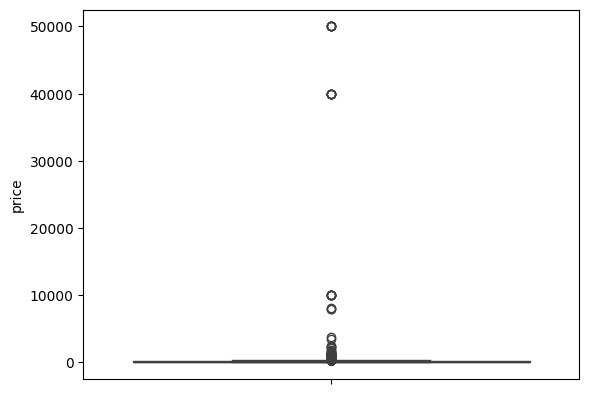

In [203]:
# Investigando en la web se encontro que con la siguiente expresion puedo validar cuales valores son mas atipicos

# Existen en el dataset las columnas eliminadas por isna y tambien las agregadas por las amenidades

print(f'El dataset contiene {df_clean.shape[1]} columnas')

# Validamos la columna precio que sera la usada para eliminar los outliers
import seaborn as sns

sns.boxplot(df_clean['price'])

QA1 = df_clean['price'].quantile(0.25)
QA3 = df_clean['price'].quantile(0.75)
IQR = QA3 - QA1

print(f'El rango intercuartilico es {IQR}')


In [204]:
# Definiremos los limites de seguridad para definiar los valores atipicos

inf_limit = QA1 - 1.5 * IQR
sup_limit = QA3 + 1.5 * IQR

print(f'El limite inferior es {inf_limit}')
print(f'El limite superior es {sup_limit}')

# Crearemos una copia para el analisis del EDA
df_clean_eda = df_clean.copy()

# Imprimimos el total de registros antes de la limpieza
print(f'El total de registros antes de la limpieza es {df_clean.shape[0]}')

# Hacemos la limpieza
df_clean = df_clean[(df_clean['price'] > inf_limit) & (df_clean['price'] < sup_limit)]

print(f'El total de registros despues de la limpieza es {df_clean.shape[0]}')

El limite inferior es -189.0
El limite superior es 315.0
El total de registros antes de la limpieza es 14274
El total de registros despues de la limpieza es 13862


## 2️⃣ Fase 2: Analisis Exporatorio (EDA)

## 🚀 2.1.  Análisis Univariado:

Histograma de precios (antes y después de quitar outliers). ¿Sigue una
distribución normal?

Text(0.5, 1.0, 'Precios sin Outliers')

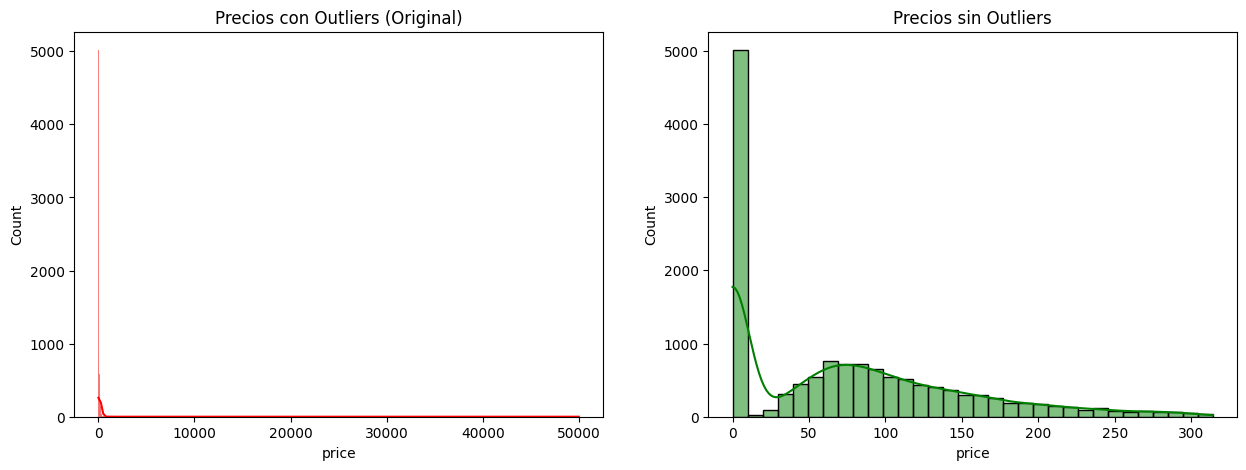

In [205]:
# Vamor a realizar un analisis de la distrubicion normal de los precios mediante un histograma

# Antes de la eliminacion de los outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el espacio para dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma ANTES (Con outliers)
sns.histplot(df_clean_eda['price'], kde=True, ax=axes[0], color='red')
axes[0].set_title('Precios con Outliers (Original)')

# Histograma Despues(Sin outliers)
sns.histplot(df_clean['price'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Precios sin Outliers')

# Este graficos, especificamente el grafico del Precios sin Outliers no sigue una distribucion ya que tenemos datos sesgados debido a los precios.
# Muchas propiedades tienen precios bajos que producen el sesgo y pocas tienes un precio distribuido o extremadamente caro


## 🚀 2.2.  Análisis Bivariado:
- Precio vs. Tipo de Alojamiento (Boxplot).
- Precio vs. Barrio (Top 10 barrios más caros - Barplot).

/tmp/ipython-input-3188695109.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Precio vs. Barrio (Top 10 barrios más caros)')

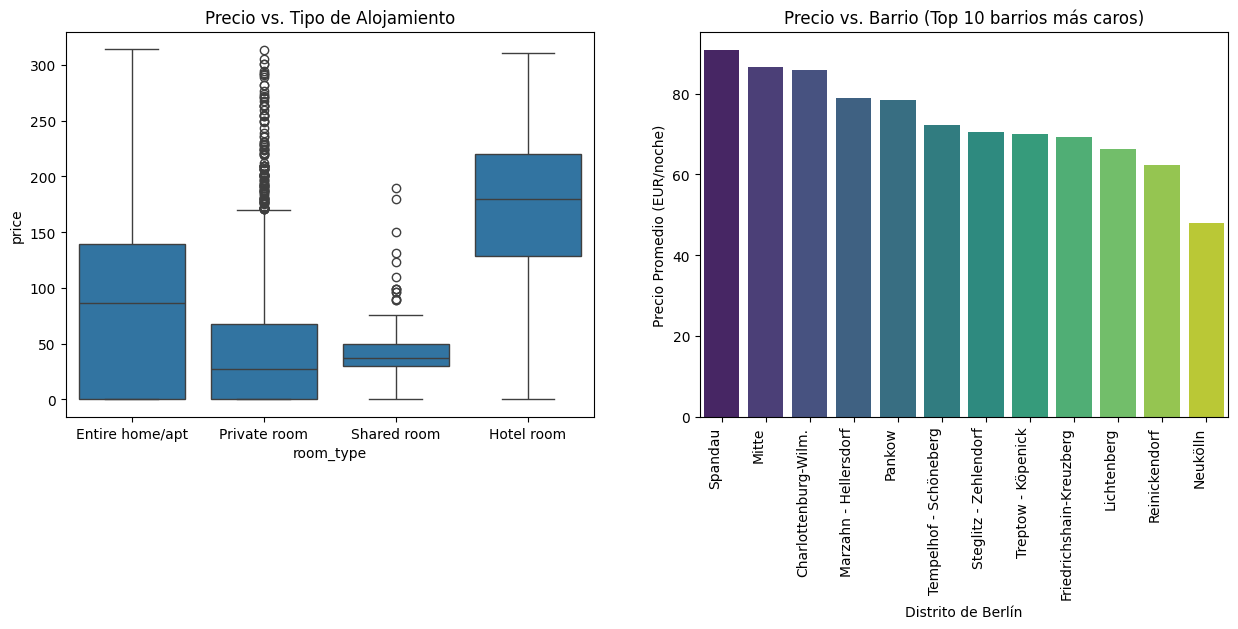

In [206]:
# Primeramente haremos el analisis de precio vs tipo de alojamiento en un tipo de grafico boxplot

# Configurar el espacio para dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Precio vs Tipo de ALojamiento (Boxplot)
sns.boxplot(x='room_type', y='price', data=df_clean, ax=axes[0])
axes[0].set_title('Precio vs. Tipo de Alojamiento')

# 2. Precio vs Barrio (Top 10 barrios mas caros)
top_10_barrios = df_clean.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
sns.barplot(x=top_10_barrios.index, y=top_10_barrios.values, ax=axes[1], palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Distrito de Berlín')
plt.ylabel('Precio Promedio (EUR/noche)')

axes[1].set_title('Precio vs. Barrio (Top 10 barrios más caros)')

# Segun el grafico se realiza mas alojamientos como privado pero son mas caras que el resto de categorias.
# Por otro lado los 10 barrios mas caros el mas caro es mayor a 80 euros y el mas barato esta entre los 40 euros

## 🚀 2.3.  Correlaciones:
- Mapa de calor (Heatmap) mostrando la correlación entre price,
accommodates, number_of_reviews, y review_scores_rating.

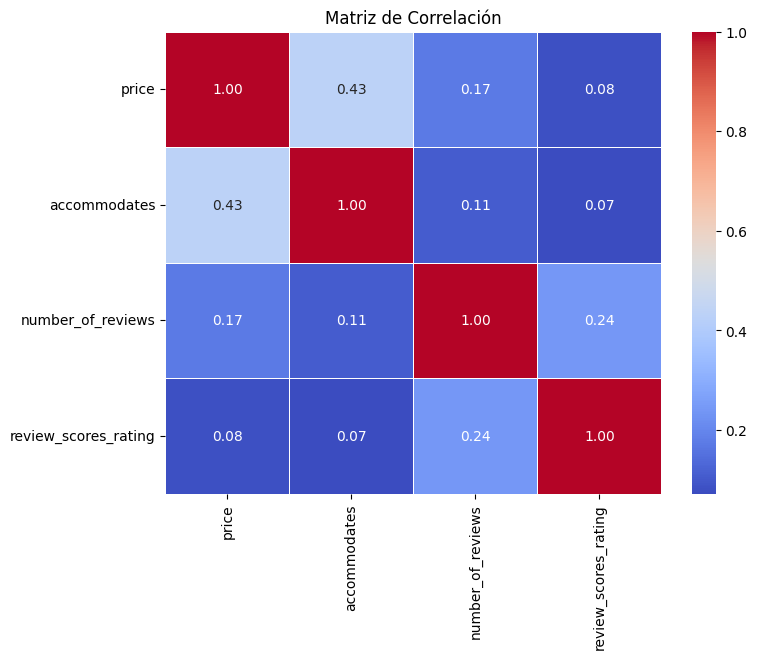

In [207]:
# En este punto haremos la correlacion entre los capos antes expuestos

df_numerico = df_clean[['price', 'accommodates', 'number_of_reviews', 'review_scores_rating']]

# Creamos la matriz de correlacion
m_correlacion = df_numerico.corr()

# Creamos el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(
    m_correlacion,
    annot=True,      # Muestra los coeficientes numéricos
    cmap='coolwarm', # Usa un esquema de color de rojo a azul
    fmt=".2f",       # Formatea a dos decimales
    linewidths=.5    # Añade bordes blancos para claridad
)

plt.title('Matriz de Correlación')
plt.show()

# Se puede entender que en hay una relacion entre el precio y la capacidad del lugar. Esto es interesante entre mas personas puedan
# acomodarse en una propiedad influye en el precio y en el alquieler.
# Otro punto que se puede analizar es el numeros de reviews y el rating de scores de revies es muy baja la relacion y eso hace entender que
# Cuando alguien contrata el airbnb se fija mas en la capacidad de la propiedad mas que en la calificacion.
# Parece que no tiene relacion el precio con el numero de reviews que es normal parece que para contratar toman mas en cuenta otros aspectos.

## 3️⃣ Fase 3: Visualización Avanzada y Negocio

## 🚀 3.1. Scatter Plot Geoespacial:
- Usar latitude y longitude para "pintar" el mapa de la ciudad,
coloreando los puntos según el precio. (Usar scatterplot de Seaborn con hue='price').

In [276]:
# Vamos a crear un mapa de la data que tenemos usando la libreria de protly.express
import plotly.express as px

fig = px.scatter_map(df_clean,
                     lat="latitude",
                     lon="longitude",
                     hover_name="neighbourhood_group_cleansed",
                     color='neighbourhood_group_cleansed',
                     zoom=10,
                     center={"lat": 52.52, "lon": 13.40},
                     labels={'neighbourhood_group_cleansed': 'Vecindarios'})

fig.update_layout(height=1000, title='Puntos con mapa de fondo')
fig.show()


In [277]:
# El mismo mapa mirado desde europa

fig_mapa = px.scatter_geo(df_clean,
                          lon='longitude',
                          lat='latitude',
                          color='neighbourhood_group_cleansed',
                          hover_name='neighbourhood_group_cleansed',
                          scope='europe', # O el scope adecuado a tus datos
                          title='Puntos coloreados por vecindario',
                          labels={'neighbourhood_group_cleansed': 'Vecindarios'}
                          )
fig_mapa.update_geos(resolution=110, showcountries=True, countrycolor="Black",center={"lat": 52.52, "lon": 13.40},projection_scale=5)
fig_mapa.show()

## 🚀 3.2. Pregunta de Negocio:
- ¿Influye la cantidad de reseñas en el precio? (Scatter plot).

In [283]:
# Para responder esta pregunta realizaremos un grafico de scatter

fig = px.scatter(
    df_clean,
    x='review_scores_rating',
    y='price',
    trendline="ols",
    trendline_color_override="red",
    title='Relación entre Calificación y Precio',
    labels={'review_scores_rating': 'Calificacion', 'price': 'Precio'},
    hover_data= ['name'],
    opacity=0.5)

fig.show()


# Como se muestra en el graficp casi no hay mucha tendencia a la subido de la linea de regresion que se mantiene plana
# Sin embargo, desde la calificacion 3 a 5 vemos una ligera subido que influje algo el precio
# Pero de manera general no influye en la calificacion.
# Por otro lado tenemos varias propieades que han tenido ninguna resena que puede ser como mencione anteriormente que son propiedades nuevas
# Para la firma de inversion tenemos que concluir algo que no es un factor influyente pero se puede tomar en cuenta.


## 4️⃣ Fase 4: Reflexión y buenas prácticas

## 5️⃣ Fase 5: Aplicación al entorno profesional